In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('train.csv')
df.head()

print(df.describe())
print(df.info())

                  ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 

In [8]:
# eda
print("shape ", df.shape)
print('missing values: ', df.isnull().sum())
print("duplicates: ", df.duplicated().sum())
print("class distribution ", df['TARGET'].value_counts())


shape  (76020, 371)
missing values:  ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64
duplicates:  0
class distribution  TARGET
0    73012
1     3008
Name: count, dtype: int64


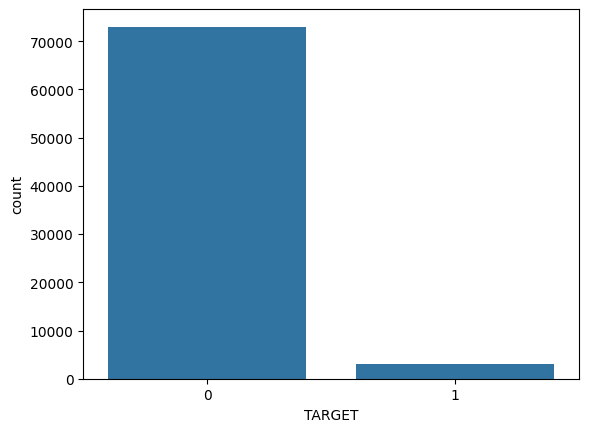

In [9]:
sns.countplot(x='TARGET', data=df)
plt.show()

df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)

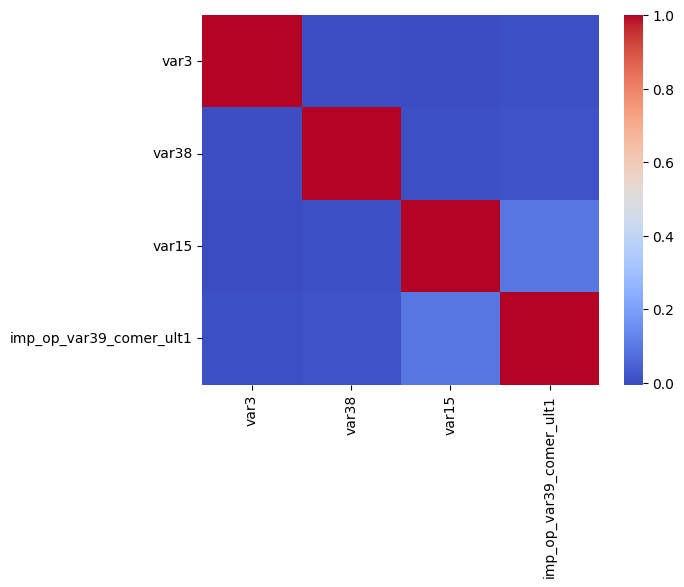

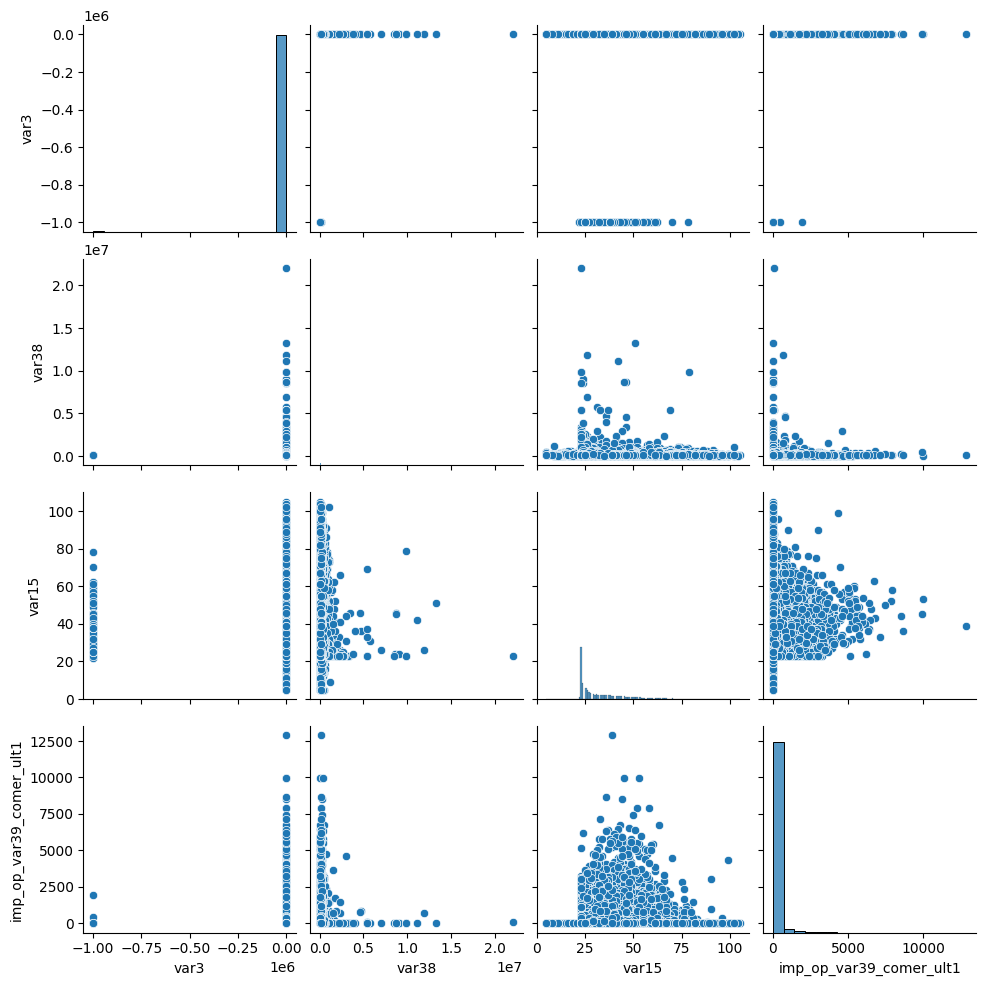

In [11]:
cols = ['var3', 'var38', 'var15', 'imp_op_var39_comer_ult1']
corr = df[cols].corr(method='pearson')

# correclation heatmap
sns.heatmap(corr, cmap='coolwarm')
plt.show()

# check linearity
sns.pairplot(df[cols])
plt.show()

In [ ]:
scaler = StandardScaler()
X = df.drop